<a href="https://colab.research.google.com/github/pranay8297/course-collaboration-travel-plans/blob/master/broken.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai import  *

In [0]:
from google.colab import files

In [17]:
files.upload()

Saving bmw.csv to bmw.csv


{'bmw.csv': b'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nhttps://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTRHFyZnNnVfGua0dNAefHcSVu1ASVnlYiQagUnDqRgxbDXfcus\nhttps://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTgHPgs-pXA9cCpfcdneXhrwMzrW2xBjdmGO8HKUZ2vat-61f_w\nhttps://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ_k9mj_zCj7NbDZN1aL71is_Ob15f8jXcR4Vbzm2O_SiWdIQrS\nhttps://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcR_Yj7Mh-amdwccYrURvvD1rQNqYuoxkIEch463fTef-bevb4hI\nhttps://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ5-mVk2tHE42dTL94w0KWCjzfl3SmK7XRQgTfQTPuR4wGiB6Ww\nhttps://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSR2H-MNfqugFaXWhlVULnFOB7YDUX0JJ7sCRKBtWZlfwm2iiCX\nhttps://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQET-LBhnUtJfKvhRJVQWZ4TKdjqErIKqzHtZZXyWw-OG7yuGTm\nhttps://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQLjTa0PhwOS867zDhKCKNX6J4MP8jZFImW7fwfrD13_NMVssI5\nhttps://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTPRf64M4xaU625-RRl85V0By6w

sample_data/


In [9]:
%pwd

'/content'

In [0]:
path = Path('/content/data/cars')

In [0]:
path.mkdir(parents= True, exist_ok= True)

In [20]:
%ls
!cp audi.csv data/cars/audi.csv
!cp benz.csv data/cars/benz.csv
!cp bmw.csv data/cars/bmw.csv

audi.csv  benz.csv  bmw.csv  data/  sample_data/


In [21]:
path.ls()

[PosixPath('/content/data/cars/bmw.csv'),
 PosixPath('/content/data/cars/audi.csv'),
 PosixPath('/content/data/cars/benz.csv')]

In [0]:
dest = path/'audi'
urls = 'audi.csv'

In [0]:
dest = path/'benz'
urls = 'benz.csv'

In [0]:
dest = path/'bmw'
urls = 'bmw.csv'

In [29]:
dest.mkdir(parents= True, exist_ok= True)
download_images(path/urls, dest, max_pics=50)

In [30]:
ls

audi.csv  benz.csv  bmw.csv  data/  sample_data/


In [0]:
!rm -rf audi
!rm -rf benz
!rm -rf bmw/

In [31]:
path.ls()

[PosixPath('/content/data/cars/benz'),
 PosixPath('/content/data/cars/bmw.csv'),
 PosixPath('/content/data/cars/audi.csv'),
 PosixPath('/content/data/cars/audi'),
 PosixPath('/content/data/cars/benz.csv'),
 PosixPath('/content/data/cars/bmw')]

In [32]:
audi_files =get_image_files(path/'audi')
audi_files[:3]

[PosixPath('/content/data/cars/audi/00000039.jpg'),
 PosixPath('/content/data/cars/audi/00000008.jpg'),
 PosixPath('/content/data/cars/audi/00000049.jpg')]

In [33]:
classes = ['benz', 'bmw', 'audi']
for i in classes:
  verify_images(path/i, delete = True,  max_workers= 1)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train = '.', valid_pct=0.2, ds_tfms = get_transforms(), size = 299, num_workers = 4, bs = 4).normalize(imagenet_stats)

In [35]:
data.classes

['audi', 'benz', 'bmw']

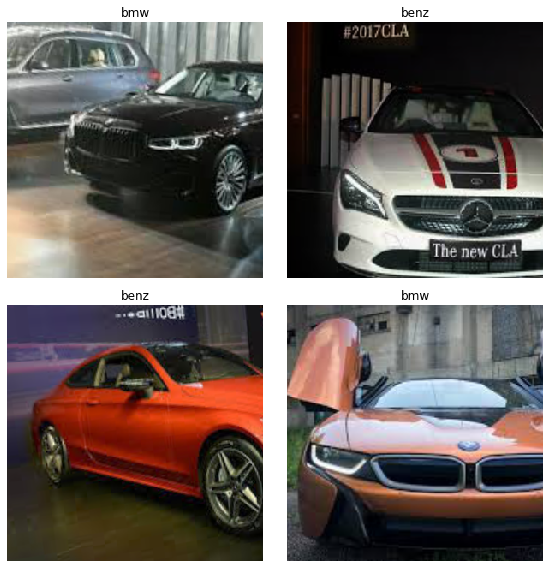

In [36]:
data.show_batch(rows = 4, fig_size = (2, 3))

In [0]:
learn = cnn_learner(data, models.resnet34, metrics = metrics.error_rate)

In [45]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,2.246116,1.316728,0.633333,00:03
1,1.949271,1.600819,0.633333,00:03
2,1.835428,1.323310,0.466667,00:03
3,1.679188,1.283000,0.566667,00:03
4,1.415484,1.225382,0.566667,00:03
5,1.262019,1.258058,0.566667,00:03


In [0]:
learn.save('broken_1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


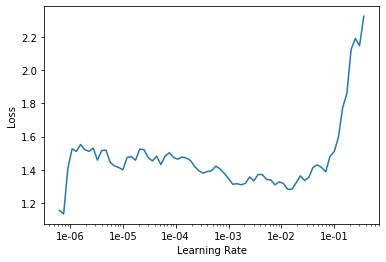

In [40]:
learn.lr_find()
learn.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


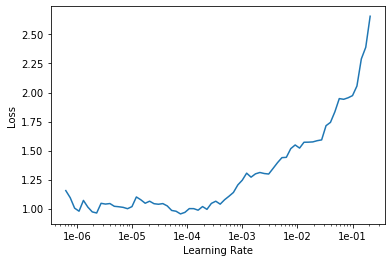

In [47]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [48]:
learn.fit_one_cycle(6, max_lr = slice(1e-5,5e-4)) 

epoch,train_loss,valid_loss,error_rate,time
0,1.132852,1.141530,0.566667,00:04
1,1.084428,1.267412,0.500000,00:04
2,1.061493,1.098530,0.466667,00:04
3,0.893836,1.067606,0.466667,00:04
4,0.835678,0.989508,0.466667,00:04
5,0.839582,0.948995,0.366667,00:04


In [0]:
data_1 = ImageDataBunch.from_folder(path, train = '.', valid_pct=0.2, ds_tfms = get_transforms(), size = 2000, num_workers = 4, bs = 4).normalize(imagenet_stats)

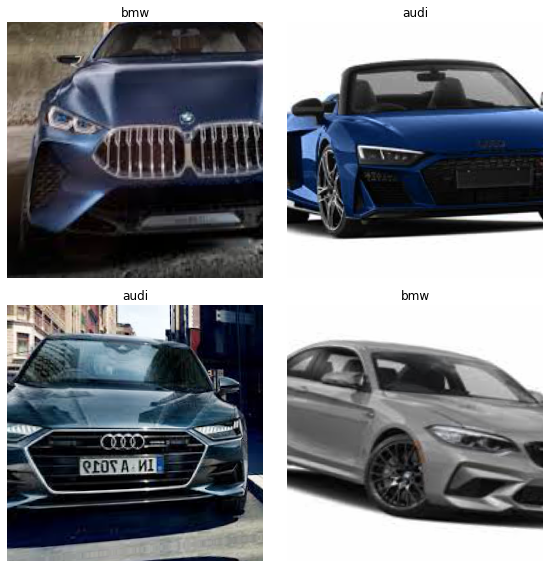

In [55]:
data_1.show_batch(rows = 3, fig_size = (6, 7))

In [0]:
learn.save('broken_2')

In [0]:
learn.data = data_1

In [58]:
learn.fit_one_cycle(6, max_lr = slice(1e-5,5e-4)) 

epoch,train_loss,valid_loss,error_rate,time
0,2.160788,1.800115,0.566667,01:34
1,1.878851,1.823997,0.700000,01:31
2,1.964755,1.216396,0.500000,01:30
3,1.780607,1.394319,0.600000,01:30
4,1.609435,1.337119,0.633333,01:32
5,1.535852,1.275317,0.600000,01:29
